In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
notas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/ratings.csv")
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# filtrando os filmes com mais de 19 notas
notas.groupby("filmeId").count().query("nota > 19")

,usuarioId,nota,momento
filmeId,,,
1,215,215,215
2,110,110,110
3,52,52,52
5,49,49,49
6,102,102,102
...,...,...,...
148626,26,26,26
152081,32,32,32
164179,26,26,26


In [5]:
# calculando a medias dos filmes com mais de 19 notas
medias_por_filme_totais = notas.groupby("filmeId").mean()
filmes_com_mais_de_19_notas = notas.groupby("filmeId").count().query("nota > 19").index
medias_filmes_filtrados19 = medias_por_filme_totais.loc[filmes_com_mais_de_19_notas]
medias_filmes_filtrados19 = medias_filmes_filtrados19[['nota']]
medias_filmes_filtrados19

,nota
filmeId,
1,3.920930
2,3.431818
3,3.259615
5,3.071429
6,3.946078
...,...
148626,3.961538
152081,3.890625
164179,3.980769


<Axes: >

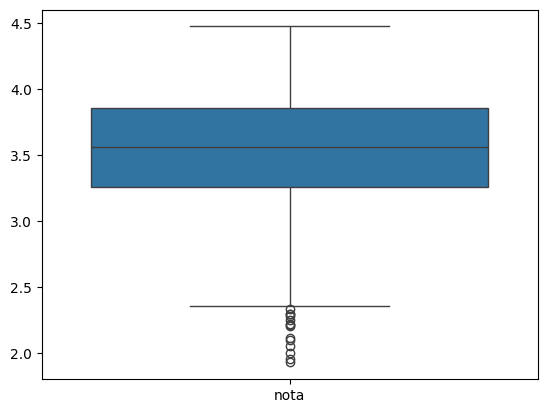

In [6]:
sns.boxplot(medias_filmes_filtrados19)

Text(0.5, 1.0, 'Histograma das médias dos filmes com mais de 19 notas')

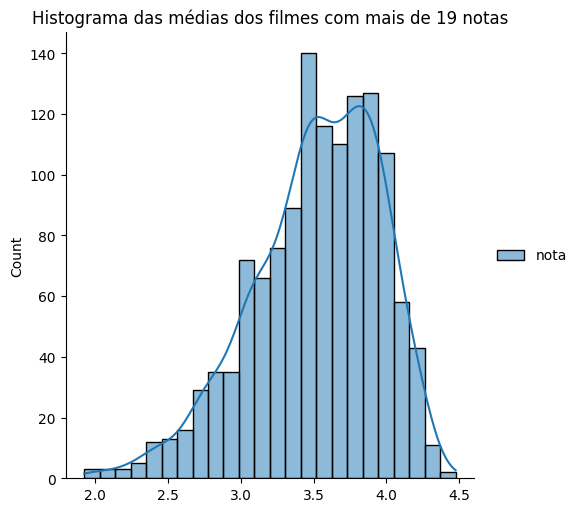

In [8]:
# aqui verificamos que a nota 3 e 4 já não são concentradas, referente ao gráfico anterior
sns.displot(medias_filmes_filtrados19, kde=True)
plt.title("Histograma das médias dos filmes com mais de 19 notas")